# Import

In [1]:
import os
import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

# Load the dataset

Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(10000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
review       10000 non-null object
sentiment    10000 non-null object
dtypes: object(2)
memory usage: 156.4+ KB
None


,review,sentiment
count,10000,10000
unique,9983,2
top,This is one of those star-filled over-the-top ...,positive
freq,2,5028


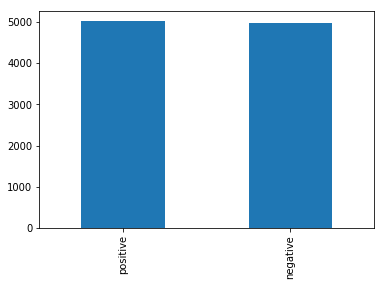

In [2]:
imdb_data=pd.read_csv('IMDBDataset.csv')

df_train=imdb_data[:10000]

print("Head")
print(df_train.head())
print("_____________________________________________________________________________")
print("Shape")
print(df_train.shape)
print("_____________________________________________________________________________")
print(df_train.info())

df_train['sentiment'].value_counts().plot(kind='bar');
df_train.describe()

The data is clean, there is no Naan values

# Preprocessing

## Tokenizing

Creation of a tokenize's function permitting to automatically tokenize our train and test set

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tokenize(data):
    corpus = [word_tokenize(token) for token in data]
    lowercase_train = [[token.lower() for token in doc] for doc in corpus]
    alphas = [[token for token in doc if token.isalpha()] for doc in lowercase_train]
    stop_words = stopwords.words('english')
    train_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]
    train_clean_str = [ ' '.join(doc) for doc in stemmed]
    return train_clean_str

In [4]:
X_train=imdb_data.review[:1000]
y_train=imdb_data.sentiment[:1000]

X_train = tokenize(X_train)

X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

X_train[1]

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

# Machine Learning

## Preprocessing

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

## Machine learning models

### MultinomialNB

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
pipe = Pipeline([('vectorizer', cvec), ('mnb', mnb)])

y_train=y_train.values.tolist()
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_pred, y_train)

cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_train, y_pred)
print(cm)
print("Accuracy :" , accuracy)
print(cr, cv)

[[499   0]
 [ 21 480]]
Accuracy : 0.979
              precision    recall  f1-score   support

    negative       0.96      1.00      0.98       499
    positive       1.00      0.96      0.98       501

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000
 0.7708844058257185


# Semi Supervised 

In [8]:
iterasi=1
acc_train=[]
acc_test=[]
acc_test2=[]

seed=1.10
data_total=len(X_train)
data_iter=int(seed*data_total)

In [9]:

print(data_total)
print(data_iter)


y_pred_fromtrain=pipe.predict(X_train)
cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_pred_fromtrain, y_train)
cm = confusion_matrix(y_train, y_pred_fromtrain)
accuracy = accuracy_score(y_pred_fromtrain, y_train)
acc_train.append(accuracy)
print("\nTrain Data=",len(X_train),len(y_train))
print("Predicton from train data model ke-",iterasi)
print("\nCross validation score:",cv,"\n",cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")


X_test=imdb_data.review[data_total:data_iter]
y_test=imdb_data.sentiment[data_total:data_iter]

pipe.fit(X_train,y_train)

print("Train Data=",len(X_train),len(y_train))
print("Test Data=",len(X_test),len(y_test))

y_test=y_test.values.tolist()
X_test=tokenize(X_test)
y_pred=pipe.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
acc_test.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





iterasi=iterasi+1


prob=pipe.predict_proba(X_test)

for data in range (0,len(X_test)) :

    if (prob[data][0]) > 0.999999 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('negative')
    if (prob[data][1]) > 0.999999 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('positive')
    elif (prob[data][0]) < 0.9 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('positive')
    elif (prob[data][1]) < 0.9 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('negative')
        
    

print(len(X_train),len(y_train))

data_total=data_iter
data_iter=int(seed*data_total)

1000
1100

Train Data= 1000 1000
Predicton from train data model ke- 1

Cross validation score: 0.7708844058257185 
               precision    recall  f1-score   support

    negative       1.00      0.96      0.98       520
    positive       0.96      1.00      0.98       480

   micro avg       0.98      0.98      0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000


Confusion Matrix : 
 [[499   0]
 [ 21 480]]
Accuracy : 0.979
__________________________________________________________________________________________________
Train Data= 1000 1000
Test Data= 100 100
prediction from test data, model ke- 1
              precision    recall  f1-score   support

    negative       0.78      0.82      0.80        51
    positive       0.80      0.76      0.78        49

   micro avg       0.79      0.79      0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.79      0.79      0.79

In [10]:
while data_total < 10000 :

    print(data_total,data_iter,len(X_train))


    y_pred_fromtrain=pipe.predict(X_train)
    cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
    cr = classification_report(y_pred_fromtrain, y_train)
    cm = confusion_matrix(y_train, y_pred_fromtrain)
    accuracy = accuracy_score(y_pred_fromtrain, y_train)
    acc_train.append(accuracy)
    print("\nTrain Data=",len(X_train),len(y_train))
    print("Predicton from train data model ke-",iterasi)
    print("\nCross validation score:",cv,"\n",cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")


    X_test=imdb_data.review[data_total:data_iter]
    y_test=imdb_data.sentiment[data_total:data_iter]

    pipe.fit(X_train,y_train)

    print("Train Data=",len(X_train),len(y_train))
    print("Test Data=",len(X_test),len(y_test))

    y_test=y_test.values.tolist()
    X_test=tokenize(X_test)
    y_pred=pipe.predict(X_test)

    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_pred, y_test)
    acc_test.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")
    
    y_pred_fromtest2=pipe.predict(X_test2)
    cr = classification_report(y_test2, y_pred_fromtest2)
    cm = confusion_matrix(y_test2, y_pred_fromtest2)
    accuracy = accuracy_score(y_pred_fromtest2, y_test2)
    acc_test2.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")





    iterasi=iterasi+1


    prob=pipe.predict_proba(X_test)

    for data in range (0,len(X_test)) :
         if (data_total+data) < 10000:
                
                if (prob[data][0]) > 0.999999 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('negative')
                if (prob[data][1]) > 0.999999 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('positive')
                elif (prob[data][0]) < 0.9 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('positive')
                elif (prob[data][1]) < 0.9 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('negative')


            


    print(len(X_train),len(y_train))
    
    data_total=data_iter
    data_iter=int(seed*data_total)

1100 1210 1119

Train Data= 1119 1119
Predicton from train data model ke- 2

Cross validation score: 0.7794255991311022 
               precision    recall  f1-score   support

    negative       1.00      0.95      0.98       593
    positive       0.95      1.00      0.97       526

   micro avg       0.98      0.98      0.98      1119
   macro avg       0.98      0.98      0.98      1119
weighted avg       0.98      0.98      0.98      1119


Confusion Matrix : 
 [[566   0]
 [ 27 526]]
Accuracy : 0.9758713136729222
__________________________________________________________________________________________________
Train Data= 1119 1119
Test Data= 110 110
prediction from test data, model ke- 2
              precision    recall  f1-score   support

    negative       0.66      0.87      0.75        45
    positive       0.88      0.69      0.78        65

   micro avg       0.76      0.76      0.76       110
   macro avg       0.77      0.78      0.76       110
weighted avg       0.79  


Train Data= 1933 1933
Predicton from train data model ke- 7

Cross validation score: 0.850593655287285 
               precision    recall  f1-score   support

    negative       1.00      0.95      0.97      1097
    positive       0.93      1.00      0.96       836

   micro avg       0.97      0.97      0.97      1933
   macro avg       0.97      0.97      0.97      1933
weighted avg       0.97      0.97      0.97      1933


Confusion Matrix : 
 [[1037    2]
 [  60  834]]
Accuracy : 0.9679255043973098
__________________________________________________________________________________________________
Train Data= 1933 1933
Test Data= 177 177
prediction from test data, model ke- 7
              precision    recall  f1-score   support

    negative       0.78      0.75      0.77        89
    positive       0.76      0.78      0.77        88

   micro avg       0.77      0.77      0.77       177
   macro avg       0.77      0.77      0.77       177
weighted avg       0.77      0.77    


Train Data= 3278 3278
Predicton from train data model ke- 12

Cross validation score: 0.8848200385628934 
               precision    recall  f1-score   support

    negative       0.99      0.95      0.97      1903
    positive       0.93      0.99      0.96      1375

   micro avg       0.97      0.97      0.97      3278
   macro avg       0.96      0.97      0.97      3278
weighted avg       0.97      0.97      0.97      3278


Confusion Matrix : 
 [[1804   11]
 [  99 1364]]
Accuracy : 0.9664429530201343
__________________________________________________________________________________________________
Train Data= 3278 3278
Test Data= 285 285
prediction from test data, model ke- 12
              precision    recall  f1-score   support

    negative       0.78      0.80      0.79       135
    positive       0.82      0.80      0.81       150

   micro avg       0.80      0.80      0.80       285
   macro avg       0.80      0.80      0.80       285
weighted avg       0.80      0.80 


Train Data= 5462 5462
Predicton from train data model ke- 17

Cross validation score: 0.9026901209863389 
               precision    recall  f1-score   support

    negative       0.99      0.95      0.97      3251
    positive       0.93      0.99      0.96      2211

   micro avg       0.96      0.96      0.96      5462
   macro avg       0.96      0.97      0.96      5462
weighted avg       0.97      0.96      0.96      5462


Confusion Matrix : 
 [[3084   32]
 [ 167 2179]]
Accuracy : 0.9635664591724643
__________________________________________________________________________________________________
Train Data= 5462 5462
Test Data= 458 458
prediction from test data, model ke- 17
              precision    recall  f1-score   support

    negative       0.73      0.80      0.76       235
    positive       0.77      0.69      0.72       223

   micro avg       0.74      0.74      0.74       458
   macro avg       0.75      0.74      0.74       458
weighted avg       0.75      0.74 

prediction from test data, model ke- 21
              precision    recall  f1-score   support

    negative       0.73      0.77      0.75      2463
    positive       0.76      0.72      0.74      2537

   micro avg       0.74      0.74      0.74      5000
   macro avg       0.74      0.74      0.74      5000
weighted avg       0.74      0.74      0.74      5000


Confusion Matrix : 
 [[1894  569]
 [ 717 1820]]
Accuracy : 0.7428
__________________________________________________________________________________________________
9023 9023
7386 8124 9023

Train Data= 9023 9023
Predicton from train data model ke- 22

Cross validation score: 0.9142939378952442 
               precision    recall  f1-score   support

    negative       0.99      0.95      0.97      5463
    positive       0.93      0.98      0.95      3560

   micro avg       0.96      0.96      0.96      9023
   macro avg       0.96      0.97      0.96      9023
weighted avg       0.96      0.96      0.96      9023


Confus

In [11]:
print("Fnal Model")

pipe.fit(X_train,y_train)

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





len(X_train)

Fnal Model
prediction from test data, model ke- 26
              precision    recall  f1-score   support

    negative       0.73      0.76      0.75      2463
    positive       0.76      0.73      0.75      2537

   micro avg       0.75      0.75      0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000


Confusion Matrix : 
 [[1869  594]
 [ 678 1859]]
Accuracy : 0.7456
__________________________________________________________________________________________________


12283

# Test

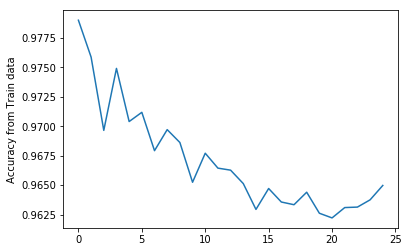

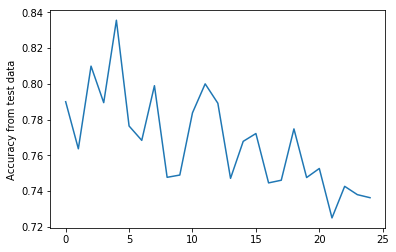

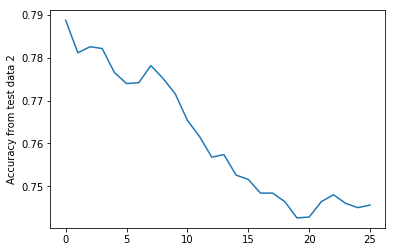

In [12]:
plt.plot(acc_train)
plt.ylabel('Accuracy from Train data')
plt.show()

plt.plot(acc_test)
plt.ylabel('Accuracy from test data')
plt.show()

plt.plot(acc_test2)
plt.ylabel('Accuracy from test data 2')
plt.show()

In [13]:
len(X_train)

12283